# Quiz 1 Programming Activity
---

## Q2 - Resume Analysis
--- 

### Task 1: Personal Resume Activity
--- 

In [1]:
# importing libraries, these must be installed (i did it with pip) into the environment 
# which you're working on (im using .venv for this project)

import matplotlib.pyplot as plt
from collections import Counter
import requests # used for HTTP GET request, downloading stopwords 
import re # regular expressions library, standard for python
import PyPDF2 # used for reading pdf's 
import os # making directory for resume collection

In [2]:
# loading stop words URL into a list once, to be used across the tasks
stopwords_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"
stopWords = requests.get(stopwords_url).text.splitlines() # (HTTP GET) fetching the stopWords list as text, splitting on newlines -> list

In [3]:
# function loading resume text from pdf, will be used now for personal resume task as well as later for the 
# group resume task
def resumeProcessor(pdfPath):
    resumeText = ""
    with open(pdfPath, "rb") as f:
        reader = PyPDF2.PdfReader(f) #whole pdf doc
        for page in reader.pages: # .pages are each page in pdf 
            resumeText += page.extract_text() + " " # adding every word to a string, making sure to not concatenate and jam pages together
    # regex to capture only words
    resumeWords = re.findall(r"\b[a-zA-Z]+\b", resumeText.lower()) # captures one or more letters in the alphabet from resumeText (lowercase)
    # removing stopWords from resumeWords -> specificWords
    specificWords = []
    for w in resumeWords:
        if w not in stopWords:
            specificWords.append(w) # adding words that are not in stopWords to specificWords
    
    return resumeWords, specificWords # returns both in one function

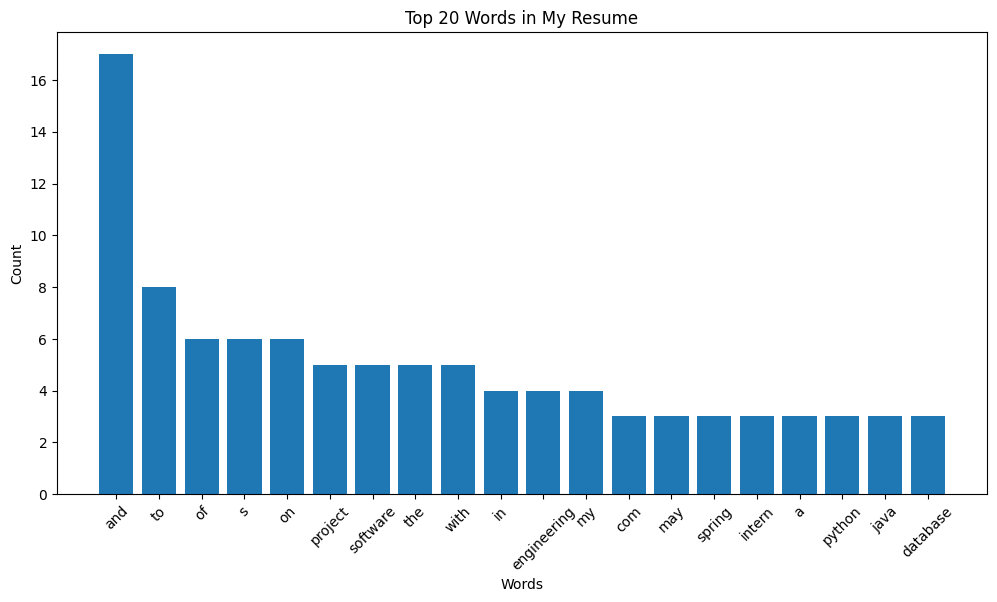

In [4]:
# plotting top 20 words before "stop words" are removed
resumeWords = resumeProcessor("gormanct_resume9.16.25.pdf")[0] # captures the first output (resumeWords)
persWordCounts = Counter(resumeWords) # Counter from collections, wordCounts dict-like obj, maps word to freq/count
top20 = persWordCounts.most_common(20) # top20 is list of tuples, words and their freq
words,counts = zip(*top20) # splits the tuples, * is unpacking operator, zip usually pairs tuples, * "unpacks"

plt.figure(figsize=(12,6)) #12 by 6 representation
plt.bar(words, counts)
plt.xticks(rotation=45) # so the labels of the words dont cover each other
plt.title("Top 20 Words in My Resume")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


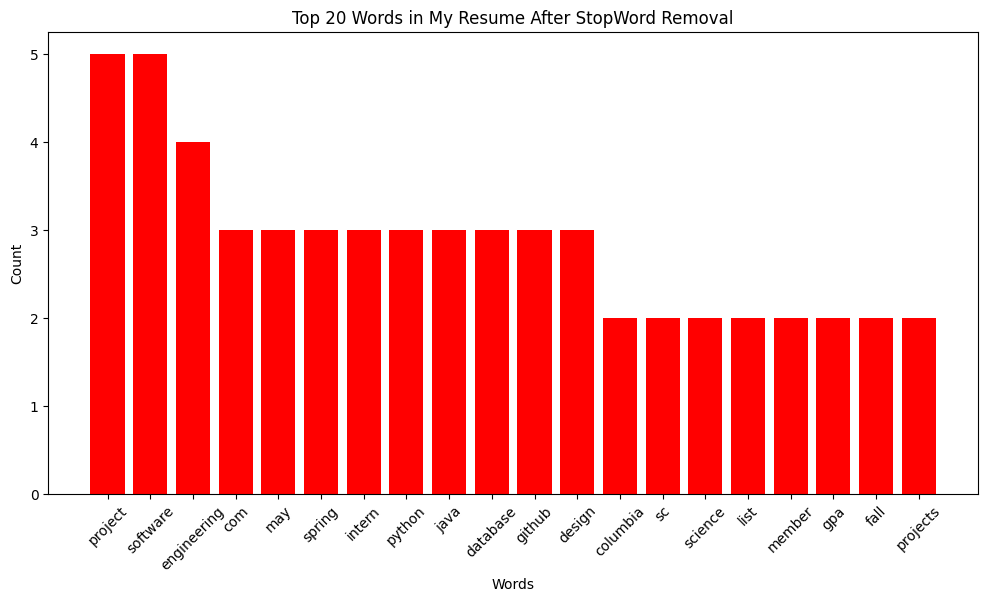

In [5]:
# plotting top 20 words after "stopWords" are removed, similarly to above
persSpecificWords = resumeProcessor("gormanct_resume9.16.25.pdf")[1] # captures specificWords from function
persFilteredCountList = Counter(persSpecificWords)
top20Filtered = persFilteredCountList.most_common(20)
filteredWords,filteredCounts = zip(*top20Filtered)

plt.figure(figsize=(12,6))
plt.bar(filteredWords,filteredCounts, color="red")
plt.xticks(rotation=45)
plt.title("Top 20 Words in My Resume After StopWord Removal")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

### Task 1 Analysis
> The removal of the stop words was definitely helpful in filtering unnecessary words. I'm not sure it was helpful in revealing more about me, as I'm not sure this is the best method for finding more out about possible job hirees. 
---


### Task 2: Group Resume Activity
--- 

In [6]:
# new import to download resumes on google drive 
# must be installed (i did it with pip) into the environment 
# which you're working on (im using .venv for this project)
import gdown
import os

In [8]:
# downloading all resumes into a resumes directory
driveLink = "https://drive.google.com/drive/folders/195-8WEmT34Ib6i4fwRu6fb7EvByU4Ryo"
os.makedirs("resumes", exist_ok=True) # making directory for resumes to 'land' in
gdown.download_folder(driveLink, output="resumes", quiet=False,use_cookies=False, remaining_ok=True, resume=True) # from gdown, want to show progress of downloads, 
# doesn't use my cookies data, remaining_ok tells gdown to keep whatever files are already downloaded, skip missing ones instead of failing,
# having issues with all of the resumes being downloaded, resume flag tells gdown to continue downloading partially downloaded files

Retrieving folder contents


Processing file 1xN8zYC21y5yBRjf0EN7Z3yV2w1fEgi-C Aashish Jayapuram Resume_Revised.pdf
Processing file 1_dUXYQJJwWdfmxC01dfXbY7my7-i549I AidanVanVoorhis_2025_Resume.pdf
Processing file 1mFsDLNg1kBuPMrMBmAbk6yq57NmRWeVL Ardoine_Docteur_Resume.pdf
Processing file 1otBZN7SlNb79UtTLP1CrwZrHvI4hsavV Camron Martin Resume.pdf
Processing file 15901RWezrTWul5ucUgrXPEbumsCYinm4 Charlie Gorman Resume 2025.pdf
Processing file 1sKSfxDTghTdlfVuZiPVNT_E-O40P7aeP Cody Miller - Resume.pdf
Processing file 1N1kKbKY-lMvkLOOW-L54_ylWQxNpehhY Copy of Nathan Nicodin Resume.pdf
Processing file 1bEwvdhTfwjvYSFhE4o2nihQ758Nly9Zf David_Dinh_Resume_2026WOGPA.pdf
Processing file 1Y5rtnrkCWJAsawz4XFBmrnVcdlQhdOPP DJ Ravenell’s Resume.pdf
Processing file 1ZBAYQzm_aexswVNggAefVTynZrsRJvqe Dustin_McDowell_Resume.pdf
Processing file 1yDyOq5_JpMD-O2vDi6p6T4drgBOM2ohS Eli_Hatcher_resume.pdf
Processing file 1dlmvuTwSRRyR-FGu07rimNFGu7tjmqvM FINAL Resume- IT Intership.pdf
Processing file 1ygT5P7Q-K-R0T_kjmmSNChsuCOX_08zX J

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1xN8zYC21y5yBRjf0EN7Z3yV2w1fEgi-C
To: /Users/charliegorman/Desktop/csce/csce580/Quiz1/resumes/Aashish Jayapuram Resume_Revised.pdf
100%|██████████| 311k/311k [00:00<00:00, 15.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_dUXYQJJwWdfmxC01dfXbY7my7-i549I
To: /Users/charliegorman/Desktop/csce/csce580/Quiz1/resumes/AidanVanVoorhis_2025_Resume.pdf
100%|██████████| 251k/251k [00:00<00:00, 3.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mFsDLNg1kBuPMrMBmAbk6yq57NmRWeVL
To: /Users/charliegorman/Desktop/csce/csce580/Quiz1/resumes/Ardoine_Docteur_Resume.pdf
100%|██████████| 151k/151k [00:00<00:00, 3.99MB/s]
Downloading...
From: https://drive.google.com/uc?id=1otBZN7SlNb79UtTLP1CrwZrHvI4hsavV
To: /Users/charliegorman/Desktop/csce/csce580/Quiz1/resumes/Camron Martin Resume.pdf
100%|██████████| 101k/101k [00:00<00:

['resumes/Aashish Jayapuram Resume_Revised.pdf',
 'resumes/AidanVanVoorhis_2025_Resume.pdf',
 'resumes/Ardoine_Docteur_Resume.pdf',
 'resumes/Camron Martin Resume.pdf',
 'resumes/Charlie Gorman Resume 2025.pdf',
 'resumes/Cody Miller - Resume.pdf',
 'resumes/Copy of Nathan Nicodin Resume.pdf',
 'resumes/David_Dinh_Resume_2026WOGPA.pdf',
 'resumes/DJ Ravenell’s Resume.pdf',
 'resumes/Dustin_McDowell_Resume.pdf',
 'resumes/Eli_Hatcher_resume.pdf',
 'resumes/FINAL Resume- IT Intership.pdf',
 'resumes/James Tabakian Resume 2025 (1).pdf',
 'resumes/Luke Peter Resume.pdf',
 'resumes/Nathan Nicodin Resume.pdf',
 'resumes/Pedro_Fischetti_Resume.pdf',
 'resumes/Resume_ALim (2).pdf',
 'resumes/Resume_Ansh_Patel.pdf',
 'resumes/Resume_Patrick_Bailey.pdf',
 'resumes/Resume_Updated_ShrutiJ.pdf',
 'resumes/Resume-jacob-robertson.pdf',
 'resumes/resume1.pdf',
 'resumes/ResumeEvanFunderburg.pdf',
 'resumes/Rice Davis Resume.pdf',
 'resumes/Ritvik N Resume.pdf',
 'resumes/SaraMuthuselvam-Resume.pdf',
 

In [9]:
# aggregating all words from all resumes into a list of strings (one string / resume)
allResumeWords = [] 
allSpecificWords = [] 

for file in os.listdir("resumes"):
    if file.endswith(".pdf"):
        resumePath = os.path.join("resumes", file) # i.e. /resumes/resume1.pdf
        resumeWords, specificWords = resumeProcessor(resumePath) # returns both
        allResumeWords.extend(resumeWords)
        allSpecificWords.extend(specificWords)

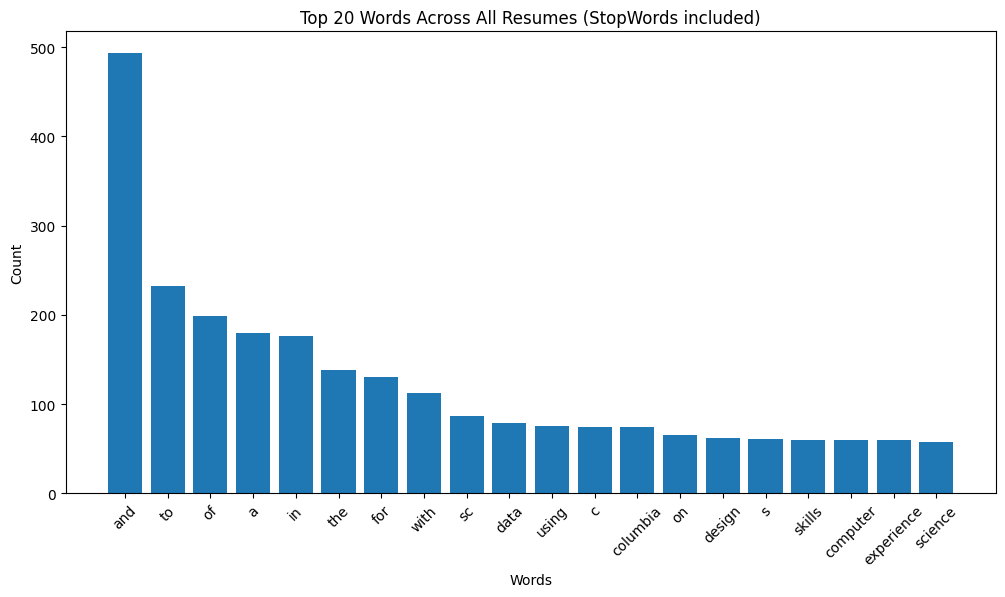

In [10]:
# plotting top 20 cumulative words before 'stopWords' removed
groupAllWordCount = Counter(allResumeWords)
top20groupAll = groupAllWordCount.most_common(20)

if top20groupAll: #only runs if list is not empty
    wordsGroup, countsGroup = zip(*top20groupAll)
    plt.figure(figsize=(12,6))
    plt.bar(wordsGroup, countsGroup)
    plt.xticks(rotation=45)
    plt.title("Top 20 Words Across All Resumes (StopWords included)")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

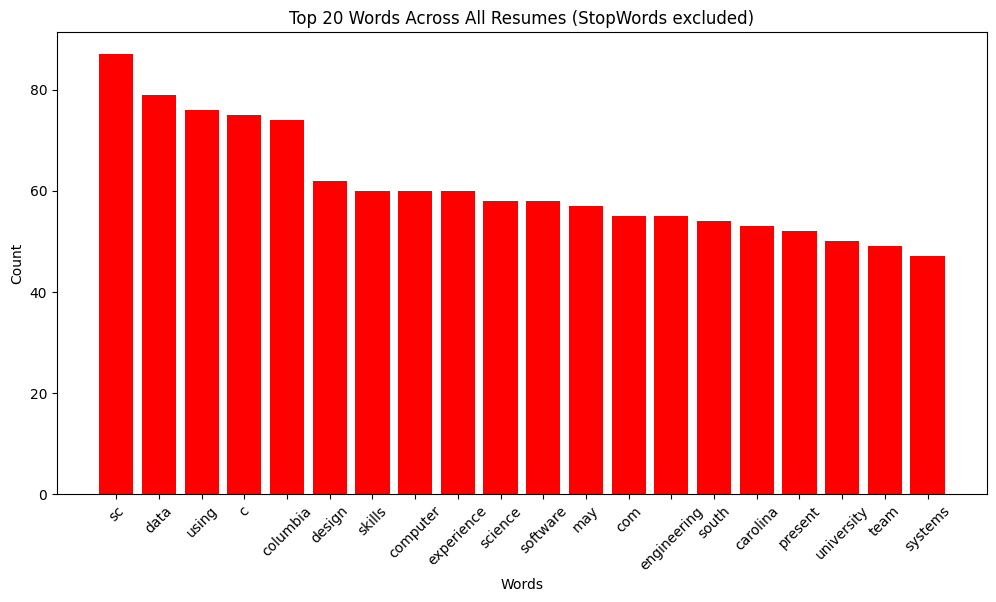

In [13]:
# plotting top 20 cumulative words after 'stopWords' removed
groupSpecificWordCount = Counter(allSpecificWords)
top20groupSpecific = groupSpecificWordCount.most_common(20)

if top20groupSpecific:
    filteredWordsGroup, filteredCountsGroup = zip(*top20groupSpecific)
    plt.figure(figsize=(12,6))
    plt.bar(filteredWordsGroup, filteredCountsGroup, color="red")
    plt.xticks(rotation=45)
    plt.title("Top 20 Words Across All Resumes (StopWords excluded)")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

### Task 2 Analysis / TASK 3
>  Unique words to my resume (according to the comparison between my resume and the aggregate of resumes for specificWords) are: 
- project, spring, intern, python, java, database, github, list, member, gpa, fall, and projects. 
>  Similarly to the previous analysis, I don't think these words really say much about how I am different as a hiree. 
---

## Q3 - Data Analysis for Social Impact
--- 

### a) Data Issues
--- 

In [15]:
# setting up imports 
#!pip install pandas numpy matplotlib scikit-learn

import pandas as pd # csv stuff (loading), cleaning, filtering, grouping, summarizing data
import numpy as np # for handling nan's 
import matplotlib.pyplot as plt # basic plotting 
 
from sklearn.preprocessing import StandardScaler # scaling for even contribution of features in clustering, allows for easier recognition of patterns
from sklearn.cluster import KMeans, DBSCAN # clustering algs, KMeans (very common clustering) DB(density based, finds outliers/noise)
from sklearn.metrics import silhouette_score # quality metric for clustering


In [16]:
# loading data from csv 
csvPath = "Redacted-Department _ CAD Reconciliation.csv"
dataFrame = pd.read_csv(csvPath)
print(dataFrame.shape) # shows rows,cols
dataFrame.head() # first 5 rows + all cols

(2200, 8)


,XREF ID,DISPATCH UNIT,DISPATCH CREATED DATE,INCIDENT NUMBER,1ST UNIT ON SCENE,ALARM DATE TIME,CALL COMPLETE,SHIFT
0,2025107105,"BAT111, E171, LDR175",3/24/25 15:54,25-1368,BC-111,3/24/25 15:46,9/5/25 16:20,C
1,2025107223,BAT111,3/24/25 17:28,25-1369,BC-111,3/24/25 17:23,9/5/25 17:55,C
2,2025107415,E171,3/24/25 21:03,25-1370,E-171,3/24/25 21:02,9/4/25 21:09,C
3,2025107411,E171,3/24/25 21:03,25-1371,NaN,3/24/25 20:58,9/4/25 21:02,C
4,2025107384,"BAT111, E171, LDR175",3/24/25 21:43,25-1374,BC-111,3/24/25 20:30,9/4/25 21:36,C


### Data Parsing / Editing
- dates (strings) -> datetimes to be easier to work w
- dispatch unit has multiple string entries @ times, splitting on commas + trimming whitespace, getting a unit count instead (for #b2),
find duration in minutes between "alarm date time" and "dispatch created date", filtering out any data that is less than 0 minutes or 
greater than one day (a lot of the time data seems large, maybe administrative overhead/delay)
- missing shift information will be replaced by inferring which shift it is (based on known shift entries and their time entries)
- missing datetime will be left as NaT/NaN, not going to be taken into account for calculations
- missing numeric data (dispatch units sent / UNITS COUNT) will be NaN, dropped for clustering to keep it to the 'cleanest' data available

In [48]:
# converting datetime fields
for col in ["DISPATCH CREATED DATE", "ALARM DATE TIME", "CALL COMPLETE"]:
    dataFrame[col] = pd.to_datetime(dataFrame[col], errors="coerce")

# CASE_ID is a stable/unique identifier for each dispatch row
# helps to make sure to count unique / distinct dispatches when dealing with the matrix's
# also helps to pinpoint outliers by their exact ID rather than a row in the csv
# so CASE_ID is either the XREF ID that is present, or if its not present, uses the index/row to give an ID
if "CASE_ID" not in dataFrame.columns: # during initializations
    dataFrame["CASE_ID"] = dataFrame["XREF ID"].astype("Int64").astype("string")
    # fallback for missing IDs just incase, use a 1-based index tag
    missingMask = dataFrame["CASE_ID"].isna() | (dataFrame["CASE_ID"].str.len() == 0)
    dataFrame.loc[missingMask, "CASE_ID"] = (dataFrame.index[missingMask] + 1).astype(str) # assigns a new id for missing ones
dataFrame["CASE_ID"] = dataFrame["CASE_ID"].astype(str)
print(dataFrame[["XREF ID","CASE_ID"]].head())

# creating UNITS_COUNT (leaving NaN if missing)
dataFrame["UNITS_COUNT"] = dataFrame["DISPATCH UNIT"].apply(
    lambda x: len(str(x).split(",")) if pd.notna(x) and str(x).strip() != "" else np.nan # lambda to count units dispatched, NaN if missing/empty
)

# 'response time' variable for the meaningful time data (closed / complete calls are way longer than makes sense)
dataFrame["RESPONSE_MINUTES"] = ((dataFrame["DISPATCH CREATED DATE"] - dataFrame["ALARM DATE TIME"]).dt.total_seconds() / 60)

      XREF ID     CASE_ID
0  2025107105  2025107105
1  2025107223  2025107223
2  2025107415  2025107415
3  2025107411  2025107411
4  2025107384  2025107384
Data covers dispatches from 2025-03-24 15:46:00 to 2025-08-31 22:58:00


In [40]:
# dealing with missing shift info, going to infer based on common shift pattern
# extracting hour of day
dataFrame["HOUR"] = dataFrame["ALARM DATE TIME"].fillna(dataFrame["DISPATCH CREATED DATE"]).dt.hour

# for shifts that have a value (a,b,c)
knownShifts = dataFrame[dataFrame["SHIFT"].notna() & (dataFrame["SHIFT"] != "Unknown")].copy() # checking for known shift
shiftHours = knownShifts.groupby("SHIFT")["HOUR"].apply(list) 

# assuming shift windows
shiftBoundaries = {
    "A": (7, 15),   # 7:00–14:59
    "B": (15, 23),  # 15:00–22:59
    "C": (23, 7)    # 23:00–06:59 
}

# helper to fix the empty shift values
def inferShift(hour):
    if hour is None or np.isnan(hour):
        return "Unknown"
    if shiftBoundaries["A"][0] <= hour < shiftBoundaries["A"][1]:
        return "A"
    elif shiftBoundaries["B"][0] <= hour < shiftBoundaries["B"][1]:
        return "B"
    else:
        return "C"

# filling in the missing data
dataFrame["SHIFT"] = dataFrame.apply(
    lambda row: row["SHIFT"] if pd.notna(row["SHIFT"]) and row["SHIFT"] != "Unknown" else inferShift(row["HOUR"]),
    axis=1
) # lambda to apply the helper function to empty / missing values

dataFrame["SHIFT"].value_counts()

SHIFT
A    760
C    733
B    707
Name: count, dtype: int64

### A1

In [49]:
# range of data, based on Alarm Date Time
startDate = dataFrame["ALARM DATE TIME"].min()
endDate = dataFrame["ALARM DATE TIME"].max()

print(f"Data covers dispatches from {startDate} to {endDate}")

Data covers dispatches from 2025-03-24 15:46:00 to 2025-08-31 22:58:00


### A2

In [41]:
# % missing by column
missingPct = dataFrame.isna().mean() * 100 #converts dataframe entries to boolean based on if missing or not (F = not missing, T = missing)
# taking the mean of that finds the avg, T = 1 F = 0, that is the fraction of missing:present values
missingPct

XREF ID                   0.000000
DISPATCH UNIT             0.000000
DISPATCH CREATED DATE     0.000000
INCIDENT NUMBER           0.000000
1ST UNIT ON SCENE        19.454545
ALARM DATE TIME           1.409091
CALL COMPLETE             1.409091
SHIFT                     0.000000
UNITS_COUNT               0.000000
RESPONSE_MINUTES          1.409091
HOUR                      0.000000
DAY_OF_WEEK               1.409091
HOUR_OF_DAY               1.409091
CASE_ID                   0.000000
dtype: float64

### A3 , A4
- There were date time format inconsistincies between DISPATCH CREATED DATE, ALARM DATE TIME, CALL COMPLETE columns, used the function "to_datetime" from the pandas library to fix the inconsistincies while also coercing the invalid values to NaT. 
- In case of missing XREF ID values (didn't turn out to be any, see above percentages) used / generated CASE_ID based on the row index to confirm each row had an identifiable attribute. 
- Dispatch Unit sometimes had multiple units (string represented) separated by commas with inconsistent spacing. I split based on commas, trimmed whitespace, and created a UNITS_COUNT col for number of units dispatched instead. 
- Some response times (time between DISPATCH CREATED DATE and ALARM DATE TIME) were extreme and unrealistic for emergency dispatching in the real-world. I filtered for plausible values (less than 2 hours) but still showed the raw representation including the outliers as well. 
- Some SHIFT's were missing, so using the ALARM DATE TIME and DISPATCH CREATED DATE and a helper function, I inferred the shift that it belonged in. 

### b) Exploratory Data Analysis
--- 

### ASSUMPTION BEING MADE
> Filtering below (average response time) for any time entry > 120, no dispatch will take more than 2 hours, could be an error on data input

### B1

In [42]:
# average response time (dropping NaN)
plausible = dataFrame[
    (dataFrame["RESPONSE_MINUTES"] >= 0) & 
    (dataFrame["RESPONSE_MINUTES"] <= 120)
]

# both unfiltered and filtered
unfilteredAvg = dataFrame["RESPONSE_MINUTES"].dropna().mean()
filteredAvg = plausible["RESPONSE_MINUTES"].mean()

print(f"Raw average response time: {unfilteredAvg:.2f} minutes")
print(f"Filtered average response time (0–120 min): {filteredAvg:.2f} minutes")

Raw average response time: 101.21 minutes
Filtered average response time (0–120 min): 5.06 minutes


### ASSUMPTION BEING MADE
> Filtering below (average units dispatched) for any call without dispatched units, removed. If a call does not require a unit to be dispatched, not considering to be a data point of interest. 

### B2

In [43]:
# average units dispatched, dropping NaN
avgUnits = dataFrame["UNITS_COUNT"].dropna().mean()
print(f"Average fire units dispatched: {avgUnits:.2f}")

Average fire units dispatched: 1.44


### B3

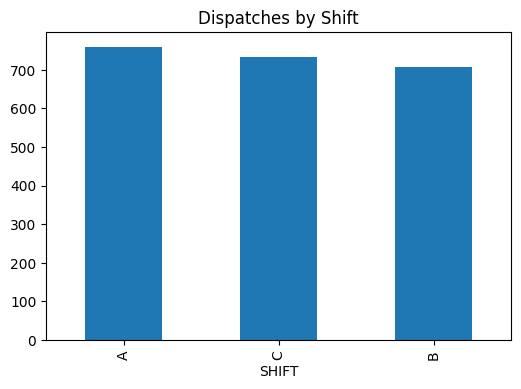


Busiest shift: A with 760 dispatches


In [44]:
# busiest shift
shiftCounts = dataFrame["SHIFT"].value_counts()
shiftCounts.plot(kind="bar", figsize=(6,4), title="Dispatches by Shift")
plt.show()
shiftCounts

busiestShift = shiftCounts.idxmax() # name of shift with highest count
busiestCount = shiftCounts.max() # number of dispatches in that shift
print(f"\nBusiest shift: {busiestShift} with {busiestCount} dispatches")

### B4

In [45]:
# day of week, hour of day matrix for fire alarms 
dataFrame["DAY_OF_WEEK"] = dataFrame["ALARM DATE TIME"].dt.day_name()
dataFrame["HOUR_OF_DAY"] = dataFrame["ALARM DATE TIME"].dt.hour

matrix = pd.pivot_table(dataFrame, index="HOUR_OF_DAY", columns="DAY_OF_WEEK", values="CASE_ID", aggfunc="count", margins=True, fill_value=0)
matrix

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
HOUR_OF_DAY,,,,,,,,
0.0,3,8,7,4,2,7,5,36
1.0,4,9,7,10,8,10,7,55
2.0,3,5,8,10,3,4,3,36
3.0,10,9,5,7,1,9,9,50
4.0,7,3,6,4,2,4,5,31
5.0,5,9,3,7,5,3,6,38
6.0,11,5,7,9,7,5,7,51
7.0,14,14,5,11,10,15,9,78
8.0,7,13,6,14,10,14,18,82


### c) Unsupervised Learning
--- 

### C1, C2
- The method that performs better is shown in the output below. 
- The labeled (human interpretable) clusters are also shown in the output below.

In [53]:
# clustering 
# features being used for clustering
features = dataFrame[["RESPONSE_MINUTES", "UNITS_COUNT"]].dropna()

scaler = StandardScaler() # scales the features so theyre comparable
X = scaler.fit_transform(features)

# two different clustering methods
methods = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)
}

results = {} # storing silhouette scores / performance metric for clusters
labelsDict = {} # for storing the assignments of rows to clusters
for name, model in methods.items(): 
    try:
        labels = model.fit_predict(X) # running cluster on feature matrix 
        labelsDict[name] = labels # storing for each method 
        score = silhouette_score(X, labels) if len(set(labels)) > 1 else -1 # making sure more than one cluster exists
        results[name] = score
    except Exception as e:
        results[name] = f"Error: {e}"

print("Silhouette scores by method:")
for method, score in results.items():
    print(f"{method}: {score}")
    
# picking best method
bestMethod = max(results, key=lambda k: results[k] if isinstance(results[k], (int,float)) else -1) # if score is a number its used, otherwise (from the except) treated as -1 
print(f"\nBest clustering method: {bestMethod} with score {results[bestMethod]}")

# attaching labels back to features for interpretation
featuresCopy = features.copy()
featuresCopy["CLUSTER"] = labelsDict[bestMethod] # attaches the Cluster to the features being clustered on

# mapping cluster IDs to human readable labels
clusterLabels = {
    -1: "Outlier/Bad Data",
     0: "Moderate emergency (3 units, ~5 min)",
     1: "Minor call (1 unit, slower response)",
     2: "Routine emergency (2 units, fast response)",
     3: "Serious fire (4 units, ~5.5 min)",
     4: "Major fire (5 units, ~6 min)"
}

# grouping the data by cluster as the distinguishing feature, while calculating the mean for the other features
clusterSummary = featuresCopy.groupby("CLUSTER").mean()
# adding a column with the human readable labels
clusterSummary["CLUSTER_LABEL"] = clusterSummary.index.map(clusterLabels)
print("\nCluster summary (mean values):")
print(clusterSummary)

Silhouette scores by method:
KMeans: 0.8628105256888899
DBSCAN: 0.9963980201335612

Best clustering method: DBSCAN with score 0.9963980201335612

Cluster summary (mean values):
         RESPONSE_MINUTES  UNITS_COUNT  \
CLUSTER                                  
-1           41161.400000          2.2   
 0               5.140940          3.0   
 1               7.069149          1.0   
 2               4.405830          2.0   
 3               5.454545          4.0   
 4               6.100000          5.0   

                                      CLUSTER_LABEL  
CLUSTER                                              
-1                                 Outlier/Bad Data  
 0             Moderate emergency (3 units, ~5 min)  
 1             Minor call (1 unit, slower response)  
 2       Routine emergency (2 units, fast response)  
 3                 Serious fire (4 units, ~5.5 min)  
 4                     Major fire (5 units, ~6 min)  
